In [1]:
import os
import h5py
import pylab
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Up to now (2022.04.28) I have performed two sets of PyCBC runs
sampleing rate: 1024; Using relative 221 as prior; Dynesty as sampler

- /work/yifan.wang/ringdown/GW150914/srate1024220

- /work/yifan.wang/ringdown/GW150914/srate1024220_221

sampleing rate: 1024; Using relative 221 as prior; cpnest as sampler; zoom in around the merger time

- /work/yifan.wang/ringdown/GW150914/cpnest-shortstride/srate1024220

- /work/yifan.wang/ringdown/GW150914/cpnest-shortstride/srate1024220_221

2022.08.03: I realize 1024 Hz sampling rate is too low for ringdown overtone. Lucky that I have 2048 Hz run as well

- /work/yifan.wang/ringdown/GW150914/220_221/

- /work/yifan.wang/ringdown/GW150914/220

In [3]:
from pycbc import detector
def tref2th1(tc,ra,dec):
    '''
    Convert time from geocenter to Hanford given ra and dec
    '''
    Det = detector.Detector('H1')
    delay = Det.time_delay_from_earth_center(ra,dec,tc)
    return tc+delay

# Get results

In [4]:
time = np.arange(-5,11,1)

In [5]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
lnb_220={}
lnb_221={}
th1 = {}

for t in range(13):
    try:
        f220 = h5py.File('/work/yifan.wang/ringdown/GW150914/pyring/r5-fixpsd-increase-flow/t'+str(t)+'/220/result.hdf','r')
        f221 = h5py.File('/work/yifan.wang/ringdown/GW150914/pyring/r5-fixpsd-increase-flow/t'+str(t)+'/221/result.hdf','r')
        th1[t] = tref2th1(f220.attrs['tref']+f220.attrs['toffset'],f220.attrs['ra'],f220.attrs['dec'])
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
    except FileNotFoundError:
        pass

In [7]:
th1

{0: 1126259462.4217749,
 1: 1126259462.422019,
 2: 1126259462.4222634,
 3: 1126259462.4225075,
 4: 1126259462.4227517,
 5: 1126259462.4229958,
 6: 1126259462.42324,
 7: 1126259462.423484,
 8: 1126259462.4237282,
 9: 1126259462.4239724,
 10: 1126259462.4242165,
 11: 1126259462.424461,
 12: 1126259462.424705}

In [8]:
lnb_221

{0: -56470.1190818307,
 1: -56470.988802948275,
 2: -56471.75625748154,
 3: -56471.03555565912,
 4: -56470.018324143275,
 5: -56469.29569050606,
 6: -56469.54792614206,
 7: -56470.49890462624,
 8: -56471.34035221826,
 9: -56470.27848834386,
 10: -56470.246783905684,
 11: -56470.747840849624,
 12: -56471.053815692096}

In [9]:
_,th1value = zip(*th1.items())
x221,y221=zip(*lnb_221.items())
x220,y220 = zip(*lnb_220.items())

#Unfortunately these runs use too low sampling rate (1024) so is not trustable

np.savetxt('./pycbc_relamp221.txt',np.transpose([x,y]),
           header='rundir:/work/yifan.wang/ringdown/GW150914/cpnest-shortstride/\nt_H1 \t lnB')

Cotesta paper: t_Hanford = 1126259462.42323

In [10]:
filec = np.loadtxt('cotesta-B.txt')

# Starting time comparison

In [11]:
t_co = 1126259462.42323

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

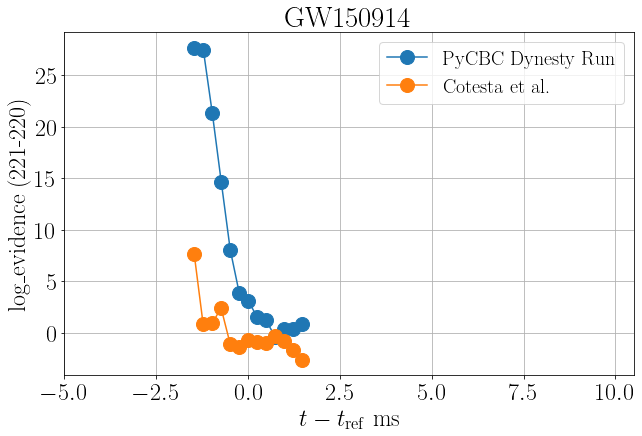

In [12]:
plt.plot((np.array(th1value)-t_co)*1000,np.array(y221)-np.array(y220),marker='o',label='PyCBC Dynesty Run')
plt.plot(filec[:,0],np.log(filec[:,1]),marker='o',label='Cotesta et al.')
plt.legend()
#plt.plot(0,0.4,marker='o')
plt.title('GW150914')
plt.ylabel('log$\_$evidence (221-220)')
plt.xlim(time[0],time[-1]+0.5)
plt.xlabel('$t-t_\mathrm{ref}$ ms')

# Zooming in

(-2.5, 2.5)

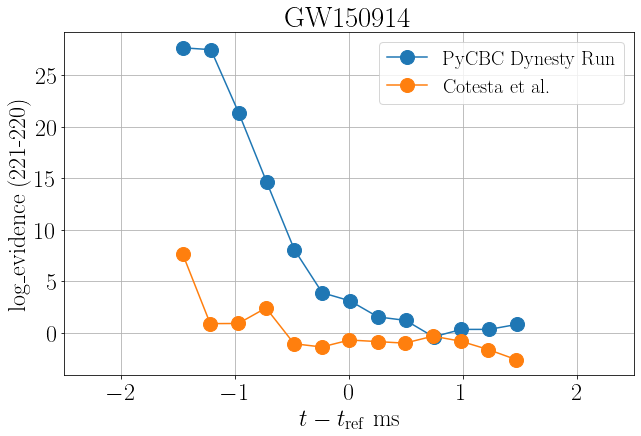

In [13]:
plt.plot((np.array(th1value)-t_co)*1000,np.array(y221)-np.array(y220),marker='o',label='PyCBC Dynesty Run')
plt.plot(filec[:,0],np.log(filec[:,1]),marker='o',label='Cotesta et al.')
plt.legend()
#plt.plot(0,0.4,marker='o')
plt.title('GW150914')
plt.ylabel('log$\_$evidence (221-220)')
plt.xlim(time[0],time[-1]+0.5)
plt.xlabel('$t-t_\mathrm{ref}$ ms')
plt.xlim(-2.5,2.5)

# Plot pyring, ringdown and pycbc in the same figure

In [14]:
rd = np.loadtxt('/work/yifan.wang/ringdown/GW150914/maxisi-data-release/mi-B.csv',delimiter=",")

In [15]:
import lal
tM = 69 * lal.MTSUN_SI
t0rd = 1126259462.423
t0pr = t0rd + 0.00023

# Zoom in

Text(0.5, 0, '$\\Delta t_\\mathrm{start}^{H1} [t_\\mathrm{M}]$')

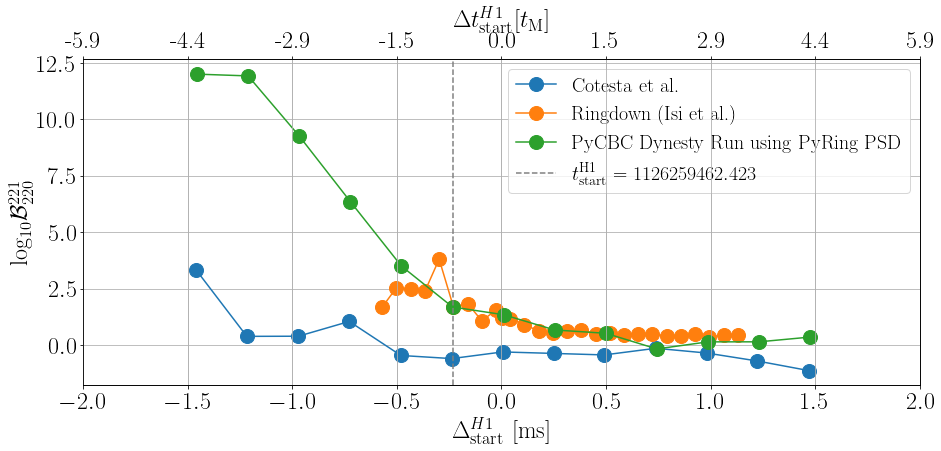

In [18]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#pyring
ax1.plot(filec[:,0],np.log10(filec[:,1]),marker='o',label='Cotesta et al.')

#ringdown. 0 corresponds to 1126259462.42323
ax1.plot(rd[:,0]*tM*1000-0.23,np.log10(rd[:,1]),marker='o',label='Ringdown (Isi et al.)')
#The 0 epoch in Ringdown paper corresponds to -0.23 in PyRing paper

ax1.plot((np.array(th1value)-t_co)*1000,np.log10(np.exp(np.array(y221)-np.array(y220))),marker='o',label='PyCBC Dynesty Run using PyRing PSD')

ax1.axvline(-0.23,ls='--',color='grey',label='$t^\mathrm{H1}_\mathrm{start}=1126259462.423$')
ax1.set_xlabel('$\Delta_\mathrm{start}^{H1}$ [ms]')
ax1.legend()
ax1.set_ylabel("log$_{10} \mathcal{B}^{221}_{220}$")
ax1.set_xlim(-2,2)

ax2.set_xticks(ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(['{:.1f}'.format(x /(tM*1000)) for x in ax1.get_xticks()])
ax2.set_xlabel('$\Delta t_\mathrm{start}^{H1} [t_\mathrm{M}]$')